# BUSINESS CHALLENGE



House Rocket Company:

A House Rocket é uma plataforma digital que têm como modelo de negócio, a compra e a venda de imóveis utilizando dados online como critério de aquisição. O objetivo é encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

A principal estratégia é adquirir imóveis em ótimas localizações com preços baixos e atrativos para revender à preços mais altos; lucrando mais, maximizando a sua receita.

https://www.kaggle.com/harlfoxem/housesalesprediction


# Aula 01:

#### Solicitações do CEO:

1) Quantas casas estão disponíveis para compra?

2) Quantos atributos as casas possuem?

3) Quais são os atributos das casas?

4) Qual a casa mais cara ( casa com o maior valor de venda )?

5) Qual a casa com o maior número de quartos?

6) Qual a soma total de quartos do conjunto de dados?

7) Quantas casas possuem 2 banheiros?

8) Qual o preço médio de todas as casas no conjunto de dados?

9) Qual o preço médio de casas com 2 banheiros?

10) Qual o preço mínimo entre as casas com 3 quartos?

11) Quantas casas possuem mais de 300 metros quadrados na sala de estar?

12) Quantas casas tem mais de 2 andares?

13) Quantas casas tem vista para o mar?

14) Das casas com vista para o mar, quantas tem 3 quartos?

15) Das casas com mais de 300 metros quadrados de sala de estar, quantas tem mais de 2 banheiros?


# Aula 02

Solicitações do CEO:

    1. Qual a data do imóvel mais antigo no portfólio?
    
    2. Quantos imóveis possuem o número máximo de andares (3.5)?
    
    3. Criar uma classificação para os imóveis, separando-os em baixo e alto padrã o de acordo com o preço Acima de 540.000 = alto padrão Abaixo de 540.00 = baixo padrão
    
    4. Fazer um relatório ordenado pelo preço e contendo as seguintes informações:
    • Id do imóvel 
    • Data que o imóvel ficou disponível para compra 
    • O número de quartos 
    • O tamanho total do terreno 
    • O preço 
    • A classificação do imóvel (alto e baixo padrão) 
    
    1. Criar um mapa indicando onde as casas estão localizadas geograficamente
    
    2. Crie um anova coluna chamada: "house_age" ==
        ◦ Se o valor da coluna "date" for maior que 2014-01-01 => 'new_house 
        ◦ Se o valor da coluna "date" for menor que 2014-01-01 => 'old_house 
        
    3. Crie uma nova coluna chamada: "dormitory_type"
        ◦ Se o valor da coluna "bedrooms" for igual à 1 => 'studio' 
        ◦ Se o valor da coluna "bedrooms" for igual à 2 => 'apartament'
        
    4. Crie uma nova coluna chamada: "condition_type"
        ◦ Se o valor da coluna "condition" for menor ou igual à 2 => 'bad' 
        ◦ Se o valor da coluna "condition" for igual à 3 ou 4 => 'regular' 
        ◦ Se o valor da coluna "condition" for igual à 5 => 'good' 
        
    5. Modifique o TIPO da coluna "condition" para STRING
    
    6. Delete as colunas "sqft_living15" e "sqft_lot15"
    
    7. Modifique o TIPO da coluna "yr_build" para DATE
    
    8. Modifique o TIPO da coluna "yr_renovated" para DATE
    
    9. Qual a data mais antiga de construção de um imóvel?
    
    10. Qual a data mais antiga de renovação de um imóvel?
    
    11. Quantos imóveis tem 2 andares?
    
    12. Quantos imóveis estão com a condição igual à "regular"?
    
    13. Quantos imóveis estão com a condição igual a "bad" e possuem "vista para água"?
    
    14. Quantos imóveis estão com a condição igual a "good" e são "new_house"?
    
    15. Qual o valor do imóvel mais caro do tipo "studio"?
    
    16. Quantos imóveis do tipo "apartament" foram reformados em 2015?
    
    17. Qual o maior número de quartos que um imóvel do tipo "house" possui?
    
    18. Quandos imóveis "new_house" foram reformados no ano de 2014?
    
    19. Selecione as colunas: "id = 0", "date = 1", "price = 2", "floors" = 7, "zipcode = 16" pelo método:
            ◦ Direto pelo nome das colunas
        ◦ Pelos índices
        ◦ Pelos índices das linhas e o nome das colunas
        ◦ Índices booleanos
        
    20. Salve um arquivo .csv com somente as colunas do item 10
    
    21. Modifique a cor dos pontos no mapa de "pink" para "verde-escuro"



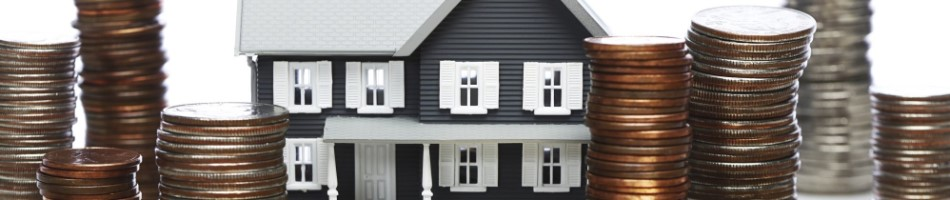

In [1]:
from IPython.display      import Image

Image( 'images.jpeg', width=1200 )

# 0.0 IMPORTS

In [35]:
# data manipulation
import pandas as pd
import numpy  as np 

import inflection
import math
import datetime

# EDA
import seaborn           as sns
import matplotlib.pyplot as plt

# Algorithms
import xgboost as xgb
import random
import warnings
warnings.filterwarnings ('ignore')

from scipy                import stats  as ss 
from IPython.core.display import HTML
from IPython.display      import Image


In [36]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size']= 24
    display( HTML( '<style>.container{ width:100% !important; }</style') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.1 Helper Functions

## 0.2 Loading Data

In [3]:
df_raw = pd.read_csv('kc_house_data.csv', low_memory=False)

In [4]:
df_raw.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19476,2122059014,20150409T000000,277500.0,4,2.0,1700,12048,2.0,0,0,...,7,1700.0,0,1990,0,98030,47.3748,-122.186,1960,7650


# PASSO 1 - DATA DESCRIPTION

In [5]:
df1 = df_raw.copy()

In [6]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1.1 Rename Columns

In [7]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
cols_old = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

#rename
df1.colums = cols_new

In [9]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1.2 Data Dimensions:

In [10]:
print ( 'Number of Rows: {}'.format( df1.shape[0] ) )
print ( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 21613
Number of Cols: 21


## 1.3 Data Types:

In [11]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above       float64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
df1['date'] = pd.to_datetime( df1['date'] )

In [13]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.4 Check 'NAs':

In [14]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
df1.sample(5).T

,1359,16115,11825,8358,2541
id,3526039116,7569500010,5616000030,5309101395,2738650030
date,2014-11-18 00:00:00,2014-11-20 00:00:00,2014-10-23 00:00:00,2014-09-11 00:00:00,2015-05-11 00:00:00
price,549000.0,616950.0,335000.0,415000.0,552500.0
bedrooms,3,3,4,2,3
bathrooms,1.75,3.5,2.5,1.0,2.5
sqft_living,2000,2490,1980,910,2450
sqft_lot,6130,2722,4745,3750,3582
floors,1.0,2.0,2.0,1.0,2.0
waterfront,0,0,0,0,0
view,0,0,0,0,0


## 1.5 Descriptive Statiscal:

In [16]:
num_attributes = df1.select_dtypes( include = ['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64'])

In [17]:
num_attributes.sample(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5935,5215200010,663000.0,3,2.5,2480,37843,1.5,1,3,4,8,2480.0,0,1974,0,98070,47.4003,-122.422,2350,42122
16460,6303400460,197000.0,2,1.0,770,8636,1.0,0,0,2,6,770.0,0,1951,0,98146,47.5075,-122.358,1110,8636
13713,2489200230,756100.0,4,2.0,2000,8317,1.5,0,0,4,8,2000.0,0,1917,0,98126,47.5394,-122.379,1390,6001


In [18]:
cat_attributes.sample(3)

""
16526
13388
18554


## 1.5.1 Numerical Atributes:

In [19]:
# Central Tendency - mean, mediana:

ct1 = pd.DataFrame( num_attributes.apply(np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply(np.median ) ).T


# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#Concatenate#
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [20]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.000102e+06,9.900000e+09,9.899000e+09,4.580302e+09,3.904930e+09,2.876499e+09,0.243329,-1.260542
1,price,7.500000e+04,7.700000e+06,7.625000e+06,5.400881e+05,4.500000e+05,3.671187e+05,4.024069,34.585540
2,bedrooms,0.000000e+00,3.300000e+01,3.300000e+01,3.370842e+00,3.000000e+00,9.300403e-01,1.974300,49.063653
3,bathrooms,0.000000e+00,8.000000e+00,8.000000e+00,2.114757e+00,2.250000e+00,7.701453e-01,0.511108,1.279902
4,sqft_living,2.900000e+02,1.354000e+04,1.325000e+04,2.079900e+03,1.910000e+03,9.184196e+02,1.471555,5.243093
5,sqft_lot,5.200000e+02,1.651359e+06,1.650839e+06,1.510697e+04,7.618000e+03,4.141955e+04,13.060019,285.077820
6,floors,1.000000e+00,3.500000e+00,2.500000e+00,1.494309e+00,1.500000e+00,5.399764e-01,0.616177,-0.484723
7,waterfront,0.000000e+00,1.000000e+00,1.000000e+00,7.541757e-03,0.000000e+00,8.651520e-02,11.385108,127.632494
8,view,0.000000e+00,4.000000e+00,4.000000e+00,2.343034e-01,0.000000e+00,7.662998e-01,3.395750,10.893022
9,condition,1.000000e+00,5.000000e+00,4.000000e+00,3.409430e+00,3.000000e+00,6.507280e-01,1.032805,0.525764


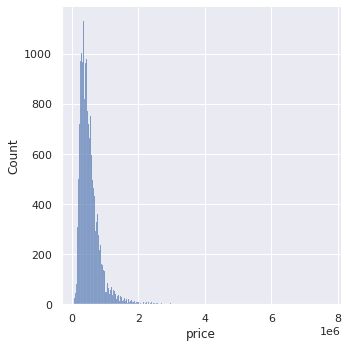

In [39]:
sns.displot( df1['price'] )
plt.show(1)

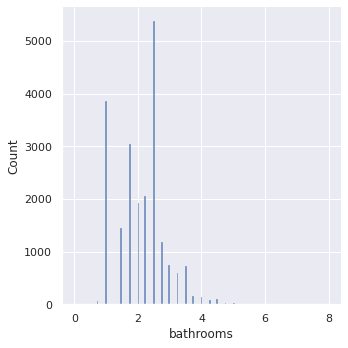

In [40]:
sns.displot( df1['bathrooms'] )
plt.show(1)

## 1.6 Categorical Attibutes:

In [23]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

Series([], dtype: float64)

# PASSO 02 - FEATURE ENGINEERING

In [24]:
df2 = df1.copy()

## 2.1 MAPA MENTAL ''house_sales_prediction''

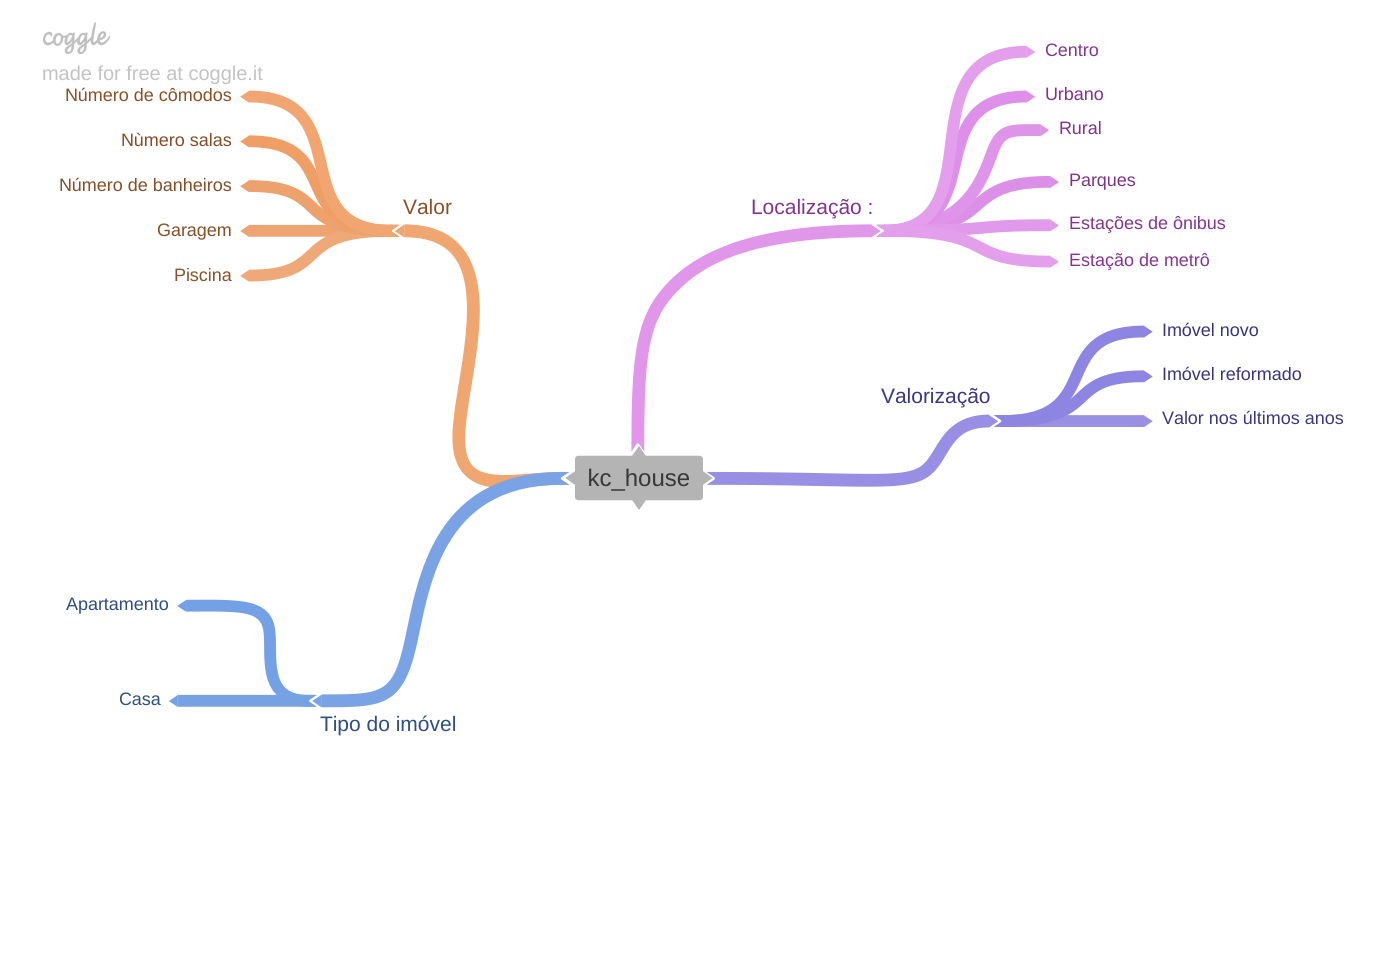

In [25]:
from IPython.display import Image

Image( 'kc_house_predictions_cogglemaps.png' )

## 2.2 Criação de hipóteses:

## 1) Imóveis nas regiões centrais têm maior valor?


## 2) Imóveis maiores têm maior valor de venda?

## 3) Imóveis com mais cômodos têm maior valor?

## 4) Imóveis menores com melhor localização são os mais procurados?

## 5) Imóveis menores e mais compactos são mais atuais e mais procurados?

# 4  PASSO 03 - ANALISE EXPLORATORIA DE DADOS

In [26]:
df3 = df2.copy()

In [27]:
df3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


## Response Variable

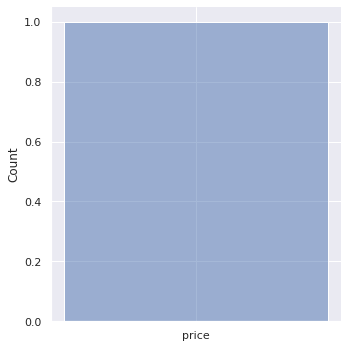

In [38]:
sns.displot( [ 'price' ], kde=True )

## Numerical Variable:

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

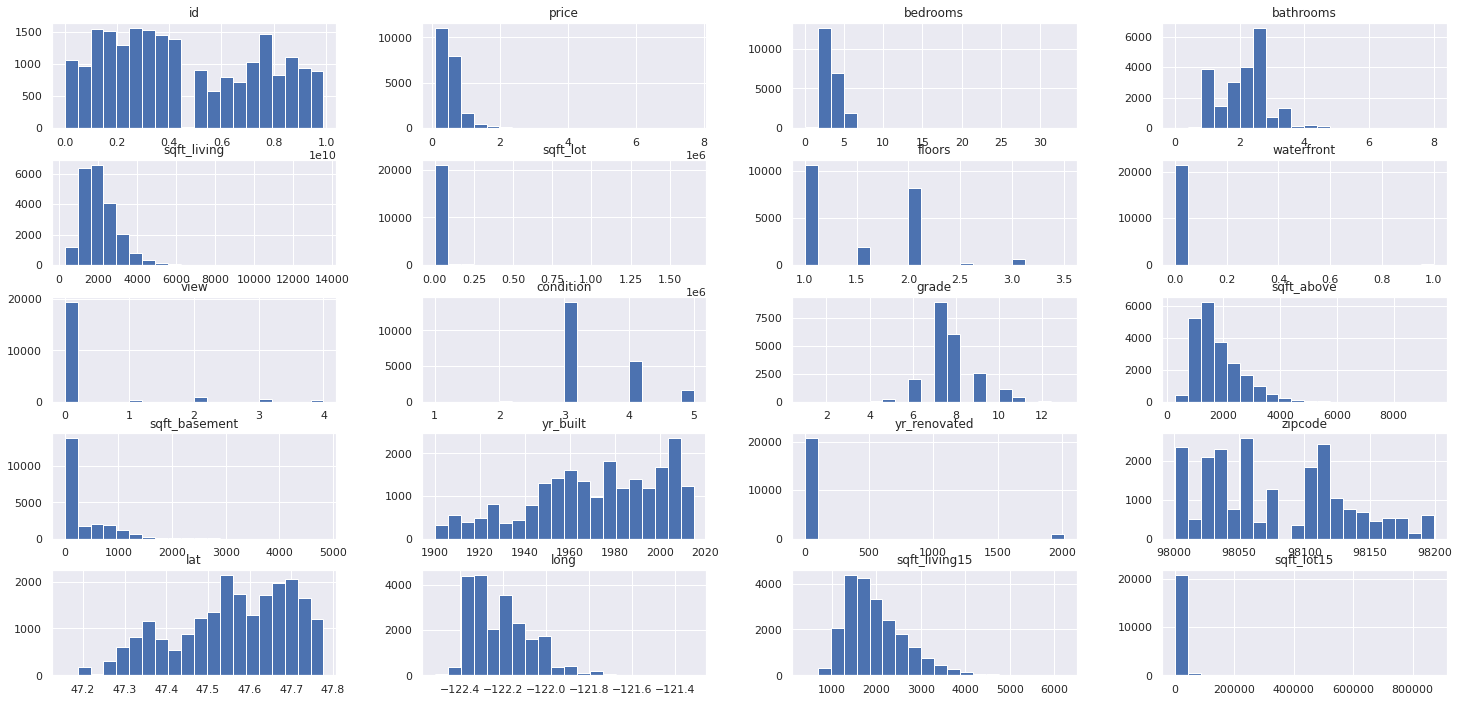

In [37]:
num_attributes.hist(bins=20)

# Aula 01

### 1) Quantas casas estão disponíveis para compra?

In [26]:
df2.shape

# O Dataset têm a cada linha um inmóvel, portanto temos  21613 imóveis para revenda.

(21613, 21)

### 2) Quantos atributos as casas possuem?

In [27]:
df2.columns

### Representam os atributos dos imóveis:

#'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
#      'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#      'lat', 'long', 'sqft_living15', 'sqft_lot15'  
###

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 3) Quais são os atributos das casas?

In [28]:
df2.columns

### Representam os atributos dos imóveis:

#'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
#      'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#      'lat', 'long', 'sqft_living15', 'sqft_lot15'  
###

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 4) Qual a casa mais cara ( casa com o maior valor de venda ) ?

In [29]:
df2.sort_values( ('price'), ascending=False)

# O imóvel mais caro seria: (7252 	6762700020 	20141013T000000 	7700000.0 	).

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570.0,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680.0,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860.0,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200.0,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720.0,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,2014-11-05,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860.0,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,2015-03-24,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730.0,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,2014-05-23,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430.0,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,2014-05-06,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780.0,0,1942,0,98168,47.4739,-122.280,1700,10387


### 5) Qual a casa com o maior número de quartos?

In [30]:
df2.sort_values( ( 'bedrooms' ), ascending=False )

# O imóvel com maior quantidade de quartos seria: (15870 	2402100895 	20140625T000000 	640000.0 	33).

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040.0,580,1947,0,98103,47.6878,-122.331,1330,4700
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400.0,600,1918,1999,98106,47.5560,-122.363,1420,4960
15161,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010.0,600,1958,0,98006,47.5705,-122.175,2040,11914
13314,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500.0,2090,2008,0,98004,47.5861,-122.113,2730,10400
19254,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860.0,1060,1913,0,98105,47.6635,-122.320,1810,3745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19452,3980300371,2014-09-26,142000.0,0,0.00,290,20875,1.0,0,0,...,1,290.0,0,1963,0,98024,47.5308,-121.888,1620,22850
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810.0,0,2003,0,98038,47.3493,-122.053,1810,5685
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064.0,0,1990,0,98102,47.6362,-122.322,2360,4000
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290.0,0,1985,0,98042,47.3473,-122.151,2500,8751


### 6) Qual a soma total de quartos do conjunto de dados?

In [31]:
df2[ 'bedrooms' ].sum()

# A soma total de quartos seria 72854.

72854

### 7) Quantas casas possuem 2 banheiros?

In [32]:
df2[( df2[ 'bathrooms' ] == 2 )].shape

# 1930 imóveis têm dois banheiros.

(1930, 21)

### 8) Qual o preço médio de todas as casas no conjunto de dados?


In [33]:
df2[ 'price' ].mean()

# $ 540088.1417665294 representa o preço médio pelo conjunto de dados.

540088.1417665294

### 9) Qual o preço médio de casas com 2 banheiros?

In [34]:
df2.loc[( df2[ 'bathrooms' ] == 2, 'price' ) ].mean()


# $ 457889.7186528497 representa o preço médio para imóveis com dois banheiros.

457889.7186528497

### 10) Qual o preço mínimo entre as casas com 3 quartos?

In [35]:
df2.loc[ ( df2[ 'bedrooms' ] == 3 ), 'price' ].min()


# $ 82000.0 representa o preço mínimo para imóveis com 3 quartos.

82000.0

### 11) Quantas casas possuem mais de 300 metros quadrados na sala de estar?


In [36]:
df2[ 'm2_living' ] = df2[ 'sqft_living' ] * 0.092

df2[ df2[ 'm2_living' ] > 300 ].shape
# 2141

(2141, 22)

### 12) Quantas casas tem mais de 2 andares?

In [37]:
df2[ df2[ 'floors' ] >= 2 ].shape
# 9023

(9023, 22)

### 13) Quantas casas tem vista para o mar?


In [38]:
df2[ df2[ 'waterfront' ] == 1 ].shape
# 163

(163, 22)

### 14) Das casas com vista para o mar, quantas tem 3 quartos?


In [39]:
df2[( df2[ 'waterfront' ] ==1 ) & (df2[ 'bedrooms' ]==3 )].shape
# 64

(64, 22)

### 15) Das casas com mais de 300 metros quadrados de sala de estar, quantas tem mais de 2 banheiros?

In [40]:
df2[( df2[ 'm2_living' ] > 300 ) & ( df2[ 'bathrooms' ] > 2 ) ].shape


(2088, 22)

# Aula 02

### 1) Qual a data do imóvel mais antigo no portfólio?
  

In [42]:
df2.sort_values( 'date', ascending= True )
# 2014-05-02

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,m2_living
16768,5561000190,2014-05-02,437500.0,3,2.25,1970,35100,2.0,0,0,...,1970.0,0,1977,0,98027,47.4635,-121.991,2340,35100,181.24
9596,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0,0,...,1700.0,900,1951,0,98117,47.6833,-122.400,2380,4750,239.20
9587,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0,0,...,2820.0,0,1979,0,98029,47.5794,-122.025,2820,48351,259.44
20602,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0,0,...,3310.0,0,2012,0,98065,47.5150,-121.870,2380,5000,304.52
11577,5056500260,2014-05-02,440000.0,4,2.25,2160,8119,1.0,0,0,...,1080.0,1080,1966,0,98006,47.5443,-122.177,1850,9000,198.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,1422700040,2015-05-14,183000.0,3,1.00,1170,7320,1.0,0,0,...,1170.0,0,1962,0,98188,47.4685,-122.282,2040,7320,107.64
928,8730000270,2015-05-14,359000.0,2,2.75,1370,1140,2.0,0,0,...,1080.0,290,2009,0,98133,47.7052,-122.343,1370,1090,126.04
5637,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,0,0,...,1870.0,0,1960,0,98007,47.5951,-122.144,1870,7650,172.04
13053,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,0,0,...,720.0,670,1941,0,98115,47.6914,-122.308,920,6380,127.88


### 2) Quantos imóveis possuem o número máximo de andares (3.5)?
   

In [41]:
df2[ df2[ 'floors' ] == 3.5 ].shape
# 8

(8, 21)

### 3) Criar uma classificação para os imóveis, separando-os em baixo e alto padrão de acordo com o preço:
#### Acima de 540.000 = alto padrão 
#### Abaixo de 540.00 = baixo padrão

In [42]:
df2['classification'] = 'None'


# 540.000 > Alto padrão
# 540.000 < Baixo padrão

df2.loc[ df2[ 'price' ] < 540000, 'classification' ] = 'low_level'

df2.loc[ df2[ 'price' ] > 540000, 'classification' ] = 'high_level'

df2[ 'classification' ]

0         low_level
1         low_level
2         low_level
3        high_level
4         low_level
5        high_level
6         low_level
7         low_level
8         low_level
9         low_level
10       high_level
11        low_level
12        low_level
13        low_level
14        low_level
15       high_level
16        low_level
17        low_level
18        low_level
19        low_level
20        low_level
21       high_level
22        low_level
23        low_level
24        low_level
25        low_level
26       high_level
27       high_level
28        low_level
29       high_level
30       high_level
31        low_level
32       high_level
33        low_level
34        low_level
35       high_level
36       high_level
37       high_level
38        low_level
39       high_level
40       high_level
41       high_level
42       high_level
43       high_level
44        low_level
45        low_level
46        low_level
47       high_level
48        low_level
49       high_level


### 4) Fazer um relatório ordenado pelo preço e contendo as seguintes informações:
• Id do imóvel 

• Data que o imóvel ficou disponível para compra 

• O número de quartos 

• O tamanho total do terreno 

• O preço 

• A classificação do imóvel (alto e baixo padrão) 

In [45]:
report = df2[['id', 'date', 'bedrooms', 'sqft_lot', 'price', 'classification']]

In [46]:
report

,id,date,bedrooms,sqft_lot,price,classification
0,7129300520,2014-10-13,3,5650,221900.0,low_level
1,6414100192,2014-12-09,3,7242,538000.0,low_level
2,5631500400,2015-02-25,2,10000,180000.0,low_level
3,2487200875,2014-12-09,4,5000,604000.0,high_level
4,1954400510,2015-02-18,3,8080,510000.0,low_level
...,...,...,...,...,...,...
21608,263000018,2014-05-21,3,1131,360000.0,low_level
21609,6600060120,2015-02-23,4,5813,400000.0,low_level
21610,1523300141,2014-06-23,2,1350,402101.0,low_level
21611,291310100,2015-01-16,3,2388,400000.0,low_level


### 5) Crie uma nova coluna chamada: "house_age" ?

    ◦ Se o valor da coluna "date" for maior que 2014-01-01 => 'new_house
    
    ◦ Se o valor da coluna "date" for menor que 2014-01-01 => 'old_house 


In [48]:
df2[ 'house_age' ] = None

In [49]:
df2.loc[ df2[ 'date' ] >= '2014-01-01', 'house_age' ] = 'new_house'

df2.loc[ df2[ 'date' ] <= '2014-01-01', 'house_age' ] = 'old_house'

In [50]:
df2['house_age']

0        new_house
1        new_house
2        new_house
3        new_house
4        new_house
           ...    
21608    new_house
21609    new_house
21610    new_house
21611    new_house
21612    new_house
Name: house_age, Length: 21613, dtype: object

### 3. Crie uma nova coluna chamada: "dormitory_type"

◦ Se o valor da coluna "bedrooms" for igual à 1 => 'studio' 

◦ Se o valor da coluna "bedrooms" for igual à 2 => 'apartament'

◦ Se o valor da coluna "bedrooms" for maior à 2 => 'house'


In [43]:
df2[ 'dormitory_type' ] = None

In [53]:
df2.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,classification,dormitory_type,condition_type
6632,5502700005,2014-06-25,330000.0,6,2.25,3040,28535,1.0,0,0,3,8,1890.0,1150,1951,0,98030,47.3864,-122.223,1360,8250,low_level,None,None


In [58]:
df2.loc[ df2[ 'bedrooms' ] == 1, 'dormitory_type' ] = 'studio'

df2.loc[ df2[ 'bedrooms' ] == 2, 'dormitory_type' ] = 'apartment'

df2.loc[ df2[ 'bedrooms' ] > 2, 'dormitory_type' ] ='house'


In [59]:
df2[ 'dormitory_type' ]

0            house
1            house
2        apartment
3            house
4            house
5            house
6            house
7            house
8            house
9            house
10           house
11       apartment
12           house
13           house
14           house
15           house
16           house
17           house
18       apartment
19           house
20           house
21           house
22           house
23       apartment
24           house
25           house
26           house
27           house
28           house
29           house
30           house
31       apartment
32           house
33           house
34           house
35           house
36           house
37           house
38           house
39           house
40           house
41           house
42           house
43           house
44           house
45           house
46           house
47           house
48           house
49           house
50           house
51           house
52          

### 4. Crie uma nova coluna chamada: "condition_type"
    ◦ Se o valor da coluna "condition" for menor ou igual à 2 => 'bad' 
    ◦ Se o valor da coluna "condition" for igual à 3 ou 4 => 'regular' 
    ◦ Se o valor da coluna "condition" for igual à 5 => 'good' 

In [60]:
df2[ 'condition_type' ] = None

In [54]:
df2.sample(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,classification,dormitory_type,condition_type
1271,7893804340,2014-07-24,470000.0,4,2.5,2680,8062,1.0,0,3,4,7,1530.0,1150,1967,0,98198,47.4132,-122.328,1920,8600,low_level,None,None
19598,7518507685,2015-02-23,400000.0,3,1.0,1100,5100,2.0,0,0,4,7,1100.0,0,1900,0,98117,47.6790,-122.386,1540,5100,low_level,None,None


In [63]:
df2.loc[ df2[ 'condition' ] <= 2, 'condition_type' ] = 'bad'

df2.loc[ ( df2[ 'condition' ] == 3 ) | (df2[ 'condition' ] == 4), 'condition_type' ] = 'regular'

df2.loc[ df2[ 'condition' ] == 5, 'condition_type' ] = 'good'

In [66]:
df2[ 'condition_type' ].head()

0    regular
1    regular
2    regular
3       good
4    regular
Name: condition_type, dtype: object

### 5. Modifique o TIPO da coluna "condition" para STRING

In [76]:
df2[ 'condition' ].dtype

dtype('O')

In [79]:
df2[ 'condition' ] = df2[ 'condition' ].astype( 'str' ) 

In [80]:
df2.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                 object
grade                      int64
sqft_above               float64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
classification            object
dormitory_type            object
condition_type            object
dtype: object

### 6. Delete as colunas "sqft_living15" e "sqft_lot15"

In [84]:
df2.drop( 'sqft_living15', axis='columns', inplace= True )

df2.drop( 'sqft_lot15', axis='columns', inplace=True )

### 7. Modifique o TIPO da coluna "yr_build" para DATE

In [85]:
df2[ 'yr_built' ].dtype

dtype('int64')

In [87]:
df2[ 'yr_built' ] = pd.to_datetime( df2[ 'yr_built' ] )

In [88]:
df2[ 'yr_built' ].dtype

dtype('<M8[ns]')

In [ ]:

1. Criar um mapa indicando onde as casas estão localizadas geograficamente











8. Modifique o TIPO da coluna "yr_renovated" para DATE

9. Qual a data mais antiga de construção de um imóvel?

10. Qual a data mais antiga de renovação de um imóvel?

11. Quantos imóveis tem 2 andares?

12. Quantos imóveis estão com a condição igual à "regular"?

13. Quantos imóveis estão com a condição igual a "bad" e possuem "vista para água"?

14. Quantos imóveis estão com a condição igual a "good" e são "new_house"?

15. Qual o valor do imóvel mais caro do tipo "studio"?

16. Quantos imóveis do tipo "apartament" foram reformados em 2015?

17. Qual o maior número de quartos que um imóvel do tipo "house" possui?

18. Quandos imóveis "new_house" foram reformados no ano de 2014?

19. Selecione as colunas: "id = 0", "date = 1", "price = 2", "floors" = 7, "zipcode = 16" pelo método:
        ◦ Direto pelo nome das colunas
    ◦ Pelos índices
    ◦ Pelos índices das linhas e o nome das colunas
    ◦ Índices booleanos

20. Salve um arquivo .csv com somente as colunas do item 10

21. Modifique a cor dos pontos no mapa de "pink" para "verde-escuro"